> # Neural Network Basic - Week3 과제


## Import Library

주어진 코드로는 계속 에러가 나서 새로운 방식으로 데이터를 로드했습니다

## Load Dataset
- MNIST 

In [2]:
import tensorflow as tf

(_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

print([i.shape for i in (x_train, y_train, x_test, y_test)])

[(60000, 28, 28), (60000,), (10000, 28, 28), (10000,)]


In [3]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000,784)

In [4]:
print(f'X_train shape: {x_train.shape}')
print(f'X_test shape: {x_test.shape}')
print(f'Y_train shape: {y_train.shape}')
print(f'Y_train shape: {y_test.shape}')

X_train shape: (60000, 784)
X_test shape: (10000, 784)
Y_train shape: (60000,)
Y_train shape: (10000,)


## Activation Function 
- sigmoid & relu : hidden layer activation function 
- softmax : output layer activation function 

In [5]:
import numpy as anp

In [6]:
class sigmoid:
    # sigmoid 함수를 작성하세요 
    def forward(x):
      A = 1 / (1 + np.exp(-x))
      return A
    
    # sigmoid 함수의 미분을 작성하세요
    def backward(x):
        B =  (1 / (1 + np.exp(-x)))*( 1 - 1 / (1 + np.exp(-x)))
        return B

In [7]:
class relu:
    # relu 함수를 작성하세요
    def forward(x):
        A = np.maximum(0, x)
        return A
    
    # relu 함수의 미분을 작성하세요
    def backward(x):
        if x > 0:
            B = 1
        else:
            B = 0
        return B

In [8]:
class softmax:
    def forward(z):
        y = []
        for zi in z:
            c = np.max(zi)
            exp_zi = np.exp(zi-c)
            sum_exp_zi = np.sum(exp_zi)
            yi = exp_zi / sum_exp_zi
            y.append(yi)

        return np.array(y)
    
    def backward(p, y) :
        dp = p.copy()
        for dpi, yi in zip(dp, y):
            for k in range(dp.shape[1]):
                if k == yi :
                    dpi[k] -= 1
        return dp

## Loss Function

In [9]:
def cross_entropy(p, y):
    loss = []
    for pi, yi in zip(p, y):
        for k in range(p.shape[1]):
            if k == yi:
                loss.append((-1) * (np.log(pi[k] + 1e-8))) 
    return loss

## Layer

In [10]:
class Layer:
    def __init__(self, input_size, output_size, std=1e-4) :
        self.input_size = input_size
        self.output_size = output_size
        self.bias = np.random.randn(output_size)
        self.weight = np.random.randn(input_size, output_size)*std

## Neural Network
- 각 메소드와 변수들의 역할을 주석으로 달아주세요! 

In [11]:
class CustomNet:
    # CustomNet을 선언할 때 생성되는 값들입니다.
    def __init__(self, lr=0.0001, epoch=500, batch_size=200): #init : 초기화 메서드로 어떤 클래스의 객체가 만들어질 때 자동으로 호출되어서 그 객체가 갖게 될 여러 가지 성질을 정해주는 일을 해준다
        self.lr = lr #learning rate는 0.0001로 지정
        self.epoch = epoch  # epoch는 500으로 지정
        self.batch_size = batch_size #batchsize는 200으로 지정
        self.loss_function = cross_entropy #loss function은 cross_entropy로 지정
        self.layers = [] # layer을 나중에 쌓기 위한 공간을 만들어두기
        self.activations = [softmax] #활성화 함수는 softmax로 지정
        self.nodes = []
    
    # Layer를 추가할 때 호출합니다
    def addLayer(self, Layer): 
        self.layers.append(Layer) #layer에 추가하고싶은 층을 추가해준다 
        if not self.nodes: #처음으로 입력하는거라 node가 비어있다면
            self.nodes.append(np.zeros(Layer.input_size)) #노드에 input_size에 대한 정보를 입력한다
        self.nodes.append(np.zeros(Layer.output_size)) #노드에 output_size에 대한 정보를 입력한다
        
    # Activation Function을 추가할 때 호출합니다
    def addActivation(self, Activation): 
        tmp = self.activations.pop() # pop: 맨 마지막 요소를 돌려주고 그 요소는 삭제한다 = 맨 마지막에 있는 activation 함수를 돌려준다, 왜냐면 이걸 최종activation 함수로 사용할거기 때문에
        self.activations.append(Activation) # 그리고 추가할 Activation 함수를 추가해주고
        self.activations.append(tmp) #아까 빼둔 tmp를 다시 추가해줌으로써 마지막 activation 함수는 계속 softmax가 될 수 있도록 해준다
        
    # 순전파 함수
    def _forward(self, X):
        self.nodes[0] = X.copy() # X를 카피해 node의 첫번째 요소로 해준다
        output = X.copy() # output의 공간을 만들기 위해 X를 카피해준다 
        for i in range(len(self.layers)): # 층의 개수만큼 반복문을 실행해준다
            Layer = self.layers[i] # 반복되는 횟수에 맞게 i번째 층이 Layer가 될 수 있게 해준다
            Activation = self.activations[i] # i번째에 있는 활성화 함수를 사용해주고
            output = np.dot(self.nodes[i], Layer.weight) # i번째 층에 있는 노드와 아까 선언한 Layer의 weight의 내적을 통해 output을 산출한다
            output = output+ Layer.bias # y의 값은 내적에 편항값을 추가해줘야하므로 Layer의 bias를 더해준다
            output = Activation.forward(output) #활성화 함수를 적용시켜주고 여기서는 softmax가 사용되도록 한다
            self.nodes[i+1] = output # output이 다음 노드의 값이 될 수 있도록 해준다 
        return output   
    
    # 역전파 함수
    def _backward(self, X, output, y) :
        for i in reversed(range(len(self.layers))): #역전파이니까 forward와 다르게 층의 개수만큼 뒤에서부터 반복될 수 있게 해준다
            a = self.nodes[i+1] # 다음 노드의 값을 가져온다
            Layer = self.layers[i] #  반복되는 횟수에 맞게 i번째 층이 Layer가 될 수 있게 해준다
            Activation = self.activations[i]  # i번째에 있는 활성화 함수를 사용해주고
            
            if i+1 == len(self.layers): #for문의 첫번째 순서라면 : self.layers[i]가 마지막 층이라면 
                error = Activation.backward(output, y) #outpu과 y의 값을 가지고 에러를 계산해라
            else: # 그걸 제외한 나머지면 
                error *= Activation.backward(a) # 노드의 값을 가지고 에러를 계산해라 
            Layer.weight -= np.dot(error.T, self.nodes[i]).T*self.lr/X.shape[0] #에러값, lr(learning rate: 0.0001)을 이용해 weigth 업데이트
            Layer.bias -= error.sum(axis=0)*self.lr/X.shape[0] #bias 업데이트
            error = np.dot(error, Layer.weight.T) # 에러값 계산
            
    # Accrucy를 반환합니다
    def _accuracy(self, output, y):
        pre_p = np.argmax(output, axis=1) #output에서 열을 따라 가장 큰 값의 인덱스를 찾는다 : 그게 모델이 예측한 y_pred이기 때문에  
        return np.sum(pre_p==y)/y.shape[0] # pre_p == y : 예측값과 y가 맞는 경우를 더해주고 y의 사이즈로 나눠줘 accuracy를 계산한다
    
    # 데이터셋에 모델을 fit할때 호출합니다
    def fit(self, X, y, val_X, val_y):
        history = {'val_acc': [],'val_loss': []}
        N = X.shape[0]
        for i in range(self.epoch): # epoch수만큼 실행해라
            for j in range(N//self.batch_size):  # mini_batch_size만큼 실행해라
                batch_mask = np.random.choice(N, self.batch_size) # N개의 batch_size 크기만큼 random하게 batch_mask 생성
                X_batch = X[batch_mask] # X batch 추출
                y_batch = y[batch_mask] # y batch 추출
                output = self._forward(X_batch) # X_batch 데이터를 순전파 시켜 output 계산 
                self._backward(X_batch, output, y_batch) # X_batch와 output, y_batch를 이용해 역전파 계산
            
            #accuracy와 loss를 기록해둡시다
            output = self._forward(val_X) # val_X 데이터를 순전파 시켜 output 계산
            history["val_acc"].append(self._accuracy(output, val_y)) # output과 val_y를 이용해 valid 데이터의 accuracy를 계산한다
            history["val_loss"].append(sum(self.loss_function(output, val_y)))  # output과 val_y를 이용해 valid 데이터의 loss 값을 계싼한다
            
            #중간중간 기록을 찍어볼 때 사용. 적절히 조절해 쓰세요
            if i % 10 == 0:
                print(i, "test accuracy :", history["val_acc"][-1]) 
                print(i, "test loss     :", history["val_loss"][-1])
        return history

## Customizing
- Network parameter, Layer architecture, Activation function .. 등등 다양한 하이퍼파라미터를 커스터마이징하여 높은 성능에 도달해 봅시다! 

In [14]:
import numpy as np

In [15]:
# 하이퍼파라미터를 적절히 조절해 뉴럴넷을 선언하세요
nn = CustomNet(lr=0.005, epoch=200, batch_size=400)

# 원하는 만큼 층과 활성화 함수를 쌓아 주세요. 기본적으로 2Layer를 예시로 적어드립니다
nn.addLayer(Layer(784,100))
nn.addActivation(sigmoid)
nn.addLayer(Layer(100,10))

In [16]:
# 선언한 뉴럴넷의 구조입니다
for layer in nn.layers:
    print(layer.weight.shape, layer.bias.shape)

(784, 100) (100,)
(100, 10) (10,)


In [17]:
history = nn.fit(x_train, y_train, x_test, y_test)

0 test accuracy : 0.141
0 test loss     : 22392.2595270654


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: RuntimeWarning: overflow encountered in exp
  after removing the cwd from sys.path.


10 test accuracy : 0.6861
10 test loss     : 11639.349749290086
20 test accuracy : 0.7759
20 test loss     : 8483.74398528711
30 test accuracy : 0.8056
30 test loss     : 7133.821375349864
40 test accuracy : 0.8205
40 test loss     : 6504.650288840137
50 test accuracy : 0.8277
50 test loss     : 6128.006655845317
60 test accuracy : 0.8319
60 test loss     : 5905.6805951089
70 test accuracy : 0.8337
70 test loss     : 5763.411068794139
80 test accuracy : 0.8363
80 test loss     : 5610.311415375757
90 test accuracy : 0.8378
90 test loss     : 5537.516071479452
100 test accuracy : 0.8415
100 test loss     : 5456.064009112391
110 test accuracy : 0.845
110 test loss     : 5404.809463639999
120 test accuracy : 0.8437
120 test loss     : 5341.787489424018
130 test accuracy : 0.8447
130 test loss     : 5316.6909099328
140 test accuracy : 0.844
140 test loss     : 5283.68072550003
150 test accuracy : 0.8444
150 test loss     : 5255.512301263192
160 test accuracy : 0.846
160 test loss     : 5249

## Accuracy, Loss Visualization
- 자유롭게 Accuracy나 Loss를 시각화하여 확인하고 결과를 확인해 보세요! 

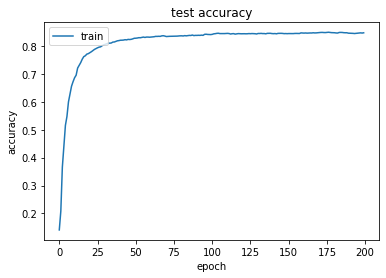

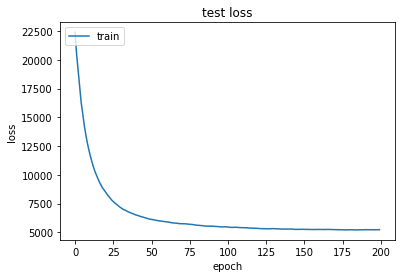

In [25]:
plt.plot(history['val_acc'])
plt.title('test accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
## summarize history for loss
plt.plot(history['val_loss'])
plt.title('test loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

epoch가 늘어날수록 loss는 감소하고 accuracy는 증가하는 것을 알 수 있다
이로 인해 model을 학습시킬수록 예측력을 높일 수 있는 방식으로 파라미터들이 업데이트 되는 걸 알 수 있다